In [1]:
# Importing necessary libraries:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
time = np.arange(1, 11) # Mathematically, [1, 11)
distance = 2 * time + 10

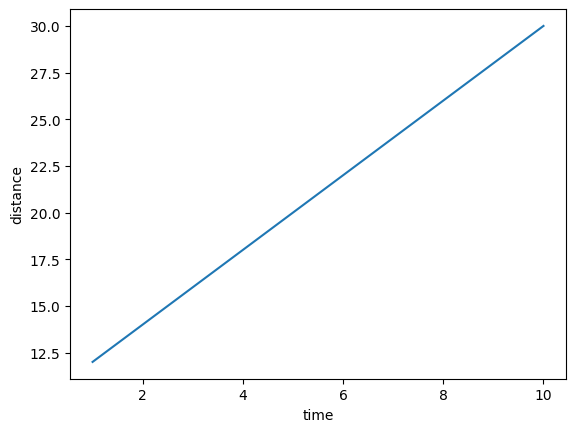

In [3]:
plt.plot(time, distance)
plt.ylabel("distance")
plt.xlabel("time")
plt.show()

# Normal Equation:

In [4]:
g = 9.8
n = 25
h0 = 100
time = np.arange(1, 11, 10/25)
u = 0
S = h0 + u * time - g*time**2/2
distorted_S = S + np.random.normal(3, 3, (25))

# Let's try to find g:
To do this, we will be minimizing the residual sum of squares.

In [5]:
def minimize_residuals(Y):
    time = np.arange(1, 11, 10/25)
    X = np.transpose(np.array([np.ones(25), time, time**2])) # Creating a column matrix.
    A = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.transpose(X)), Y)
    return A

def compute_g(A):
    return  A[2] * -2

def full_compute(Y):
    A = minimize_residuals(Y)
    return compute_g(A)

In [6]:
full_compute(S), full_compute(distorted_S)

(9.800000000000233, 9.790734720590711)

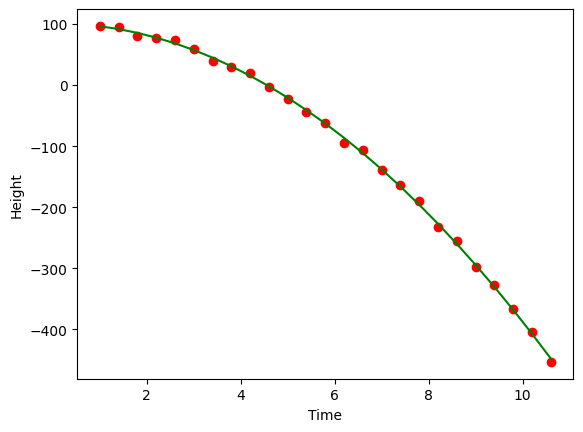

In [8]:
plt.scatter(time, distorted_S, c = "r")
plt.plot(time, np.transpose(np.array([np.ones(25), time, time**2])) @ minimize_residuals(distorted_S), c = "g")
plt.xlabel("Time")
plt.ylabel("Height")
plt.show()